get data from cloneing a github repo

In [ ]:
!git clone https://github.com/alexeygrigorev/mlbookcamp-code


Cloning into 'mlbookcamp-code'...
remote: Enumerating objects: 4258, done.
remote: Counting objects: 100% (4258/4258), done.
remote: Compressing objects: 100% (1592/1592), done.
remote: Total 4258 (delta 2548), reused 4235 (delta 2534), pack-reused 0
Receiving objects: 100% (4258/4258), 9.02 MiB | 18.17 MiB/s, done.
Resolving deltas: 100% (2548/2548), done.


import important libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

#trying to understand the data
first we assign the data for a varible by reading it from csv file


In [ ]:
df = pd.read_csv('/content/mlbookcamp-code/chapter-02-car-price/data.csv')
len(df)

11914

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
for col in df.columns:
  print(col,':' , df[col].nunique())
  print(df[col].value_counts().nlargest(5))
  print('\n' + '*' * 20 +'\n')

Make : 48
Make
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: count, dtype: int64

********************

Model : 915
Model
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: count, dtype: int64

********************

Year : 28
Year
2015    2170
2016    2157
2017    1668
2014     589
2012     387
Name: count, dtype: int64

********************

Engine Fuel Type : 10
Engine Fuel Type
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
diesel                             154
Name: count, dtype: int64

********************

Engine HP : 356
Engine HP
200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
Name: count, dtype: int64

********************

Engine Cylinders : 9
Engine Cylinders
4.0     4752
6.0     4489
8.0     2031
12.0     230
5.

#some cleaning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ' , '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
print(string_columns)
for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ' , '_')

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [ ]:
df.rename(columns = {'msrp' : 'price'} , inplace =True)

#exploratory data analysis

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format  #to make only two decimals appear after the .
df.describe() #summary for numerical data

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
count,"11,914.00","11,845.00","11,884.00","11,908.00","11,914.00","11,914.00","11,914.00","11,914.00"
mean,"2,010.38",249.39,5.63,3.44,26.64,19.73,"1,554.91","40,594.74"
std,7.58,109.19,1.78,0.88,8.86,8.99,"1,441.86","60,109.10"
min,"1,990.00",55.00,0.00,2.00,12.00,7.00,2.00,"2,000.00"
25%,"2,007.00",170.00,4.00,2.00,22.00,16.00,549.00,"21,000.00"
50%,"2,015.00",227.00,6.00,4.00,26.00,18.00,"1,385.00","29,995.00"
75%,"2,016.00",300.00,6.00,4.00,30.00,22.00,"2,009.00","42,231.25"
max,"2,017.00","1,001.00",16.00,4.00,354.00,137.00,"5,657.00","2,065,902.00"


In [ ]:
df.describe(include=['O']) #summary for categorical data

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


#target varible analysis (price)

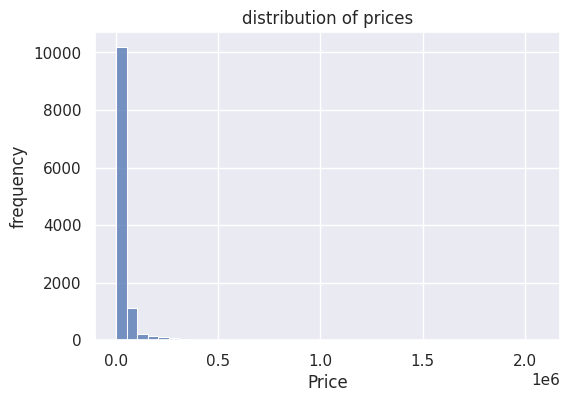

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df.price , bins = 40)
plt.ylabel('frequency')
plt.xlabel('Price')
plt.title('distribution of prices')
plt.show()


 this is a **long tail** distribution , we can have closer look by zooming in a bit and looking at values below $100,000




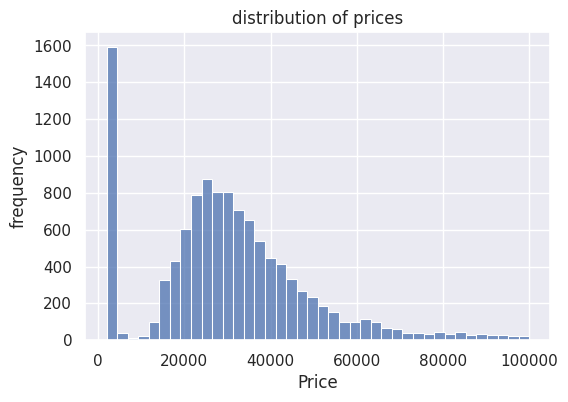

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df.price[df.price<100000] , bins = 40)
plt.ylabel('frequency')
plt.xlabel('Price')
plt.title('distribution of prices')
plt.show()

the long tail makes it quite difficult for us to see the distribution , but it has an even stronger effect on a model such :distribution can greatly confuse the model , so it won't learn enough.


> one way to solve this problem is log transformation.







# log transformation

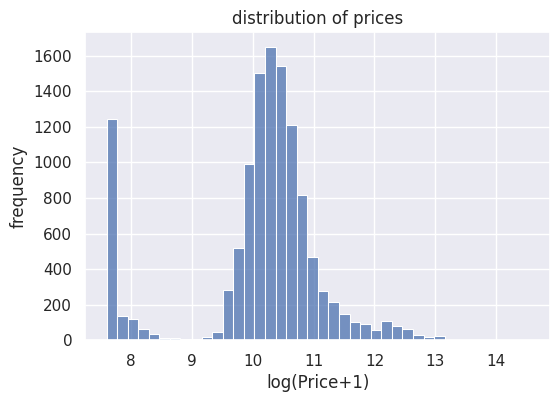

In [ ]:
df['log_price'] = np.log1p(df.price)

plt.figure(figsize=(6,4))
sns.histplot(df.log_price , bins = 40)
plt.ylabel('frequency')
plt.xlabel('log(Price+1)')
plt.title('distribution of prices')
plt.show()

In [ ]:
df.price.skew()

11.771987129334972

In [ ]:
df.log_price.skew()

-0.9178678067039072

#check missing values

In [ ]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
log_price               0
dtype: int64

#check categorical columns

In [ ]:
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

keep in mind that we will need to transform categorical data into numeric

#some questions



>what is the average price of bmw cars in the dataset



In [ ]:
df.make.value_counts()

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

In [ ]:
df.groupby('make')['price'].mean()

make
acura              34,887.59
alfa_romeo         61,600.00
aston_martin      197,910.38
audi               53,452.11
bentley           247,169.32
bmw                61,546.76
bugatti         1,757,223.67
buick              28,206.61
cadillac           56,231.32
chevrolet          28,350.39
chrysler           26,722.96
dodge              22,390.06
ferrari           238,218.84
fiat               22,670.24
ford               27,399.27
genesis            46,616.67
gmc                30,493.30
honda              26,674.34
hummer             36,464.41
hyundai            24,597.04
infiniti           42,394.21
kia                25,310.17
lamborghini       331,567.31
land_rover         67,823.22
lexus              47,549.07
lincoln            42,839.83
lotus              69,188.28
maserati          114,207.71
maybach           546,221.88
mazda              20,039.38
mclaren           239,805.00
mercedes-benz      71,476.23
mitsubishi         21,240.54
nissan             28,583.43
oldsmobil

#compare the average price for cars before/after year2015

In [ ]:
df[df['year'] >= 2015]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
32,fiat,124_spider,2017,premium_unleaded_(recommended),160.00,4.00,manual,rear_wheel_drive,2.00,performance,compact,convertible,35,26,819,27495,10.22
33,fiat,124_spider,2017,premium_unleaded_(recommended),160.00,4.00,manual,rear_wheel_drive,2.00,performance,compact,convertible,35,26,819,24995,10.13
34,fiat,124_spider,2017,premium_unleaded_(recommended),160.00,4.00,manual,rear_wheel_drive,2.00,performance,compact,convertible,35,26,819,28195,10.25
41,bmw,2_series,2016,premium_unleaded_(required),240.00,4.00,automatic,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,35,23,3916,32850,10.40
42,bmw,2_series,2016,premium_unleaded_(required),240.00,4.00,automatic,rear_wheel_drive,2.00,luxury,compact,convertible,34,23,3916,38650,10.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898,bmw,z4,2015,premium_unleaded_(required),300.00,6.00,automated_manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,convertible,24,17,3916,56950,10.95
11899,bmw,z4,2015,premium_unleaded_(required),335.00,6.00,automated_manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,convertible,24,17,3916,65800,11.09
11900,bmw,z4,2016,premium_unleaded_(required),300.00,6.00,automated_manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,convertible,24,17,3916,57500,10.96
11901,bmw,z4,2016,premium_unleaded_(required),240.00,4.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,34,22,3916,49700,10.81


In [ ]:
df.price.mean() #for overall data

40594.737032063116

In [ ]:
df[df['year'] >= 2015]['price'].mean() #for cars after 2015

45667.156463719766

In [ ]:
df[df['year'] < 2015]['price'].mean() #for cars before 2015

35457.18770062511

#split the data for training , validation and testing

In [ ]:
np.random.seed(2)  #the seed method for making the results reducable every time we run the code
n=len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

print('no. of row for training : ' , n_train)
print('no. of row for validation : ' , n_val)
print('no. of row for test : ' , n_test)

no. of row for training :  7150
no. of row for validation :  2382
no. of row for test :  2382


In [ ]:
idx = np.arange(n)
print(idx)
np.random.shuffle(idx) #to shuffle the data indexes due to model quality for training and testing
print(idx)

[    0     1     2 ... 11911 11912 11913]
[2735 6720 5878 ... 6637 2575 7336]


In [ ]:
df_shuffled = df.iloc[idx] #assign the shuffled indexes to the data
print(df.index)
print(df_shuffled.index)

RangeIndex(start=0, stop=11914, step=1)
Index([ 2735,  6720,  5878, 11190,  4554,  8001,  2882,   649,   616,  4459,
       ...
        6751,   433,  4770, 11527,  1099,  2514, 11798,  6637,  2575,  7336],
      dtype='int64', length=11914)


In [ ]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [ ]:
df_train.shape

(7150, 17)

In [ ]:
df_val.shape

(2382, 17)

In [ ]:
df_test.shape

(2382, 17)

In [ ]:
y_train = df_train.log_price.values #the .values make the return as numpy array so we can get it into the model
y_val = df_val.log_price.values
y_test = df_test.log_price.values

#baseline solution

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] #think about numerical only

In [ ]:
df[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.00,6.00,26,19,3916
1,300.00,6.00,28,19,3916
2,300.00,6.00,28,20,3916
3,230.00,6.00,28,18,3916
4,230.00,6.00,28,18,3916
...,...,...,...,...,...
11909,300.00,6.00,23,16,204
11910,300.00,6.00,23,16,204
11911,300.00,6.00,23,16,204
11912,300.00,6.00,23,16,204


In [ ]:
df[base].isnull().sum()

engine_hp           69
engine_cylinders    30
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

#handling missing values

In [ ]:
def prepare_X(df):
  df_num = df[base]
  df_num = df_num.fillna(df_num.mean())
  X = df_num.values
  return X

#linear regression

<Axes: >

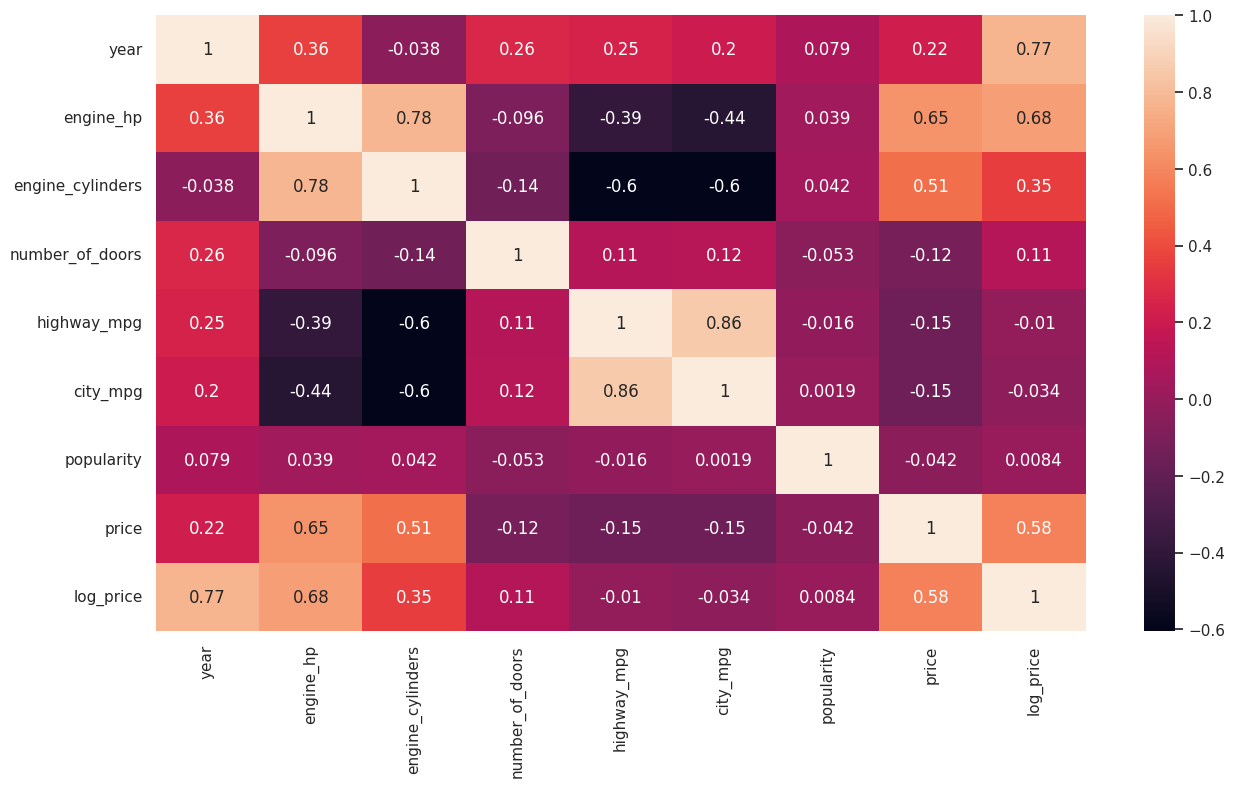

In [ ]:
# Exclude non-numeric columns from correlation calculation
numeric_df_train = df_train.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15,8))
sns.heatmap(numeric_df_train.corr(), annot=True)  #corrolation heat map to know if their is linear corrolation between columns


In [ ]:
def linear_regression(xi):
  n=len(xi)         #num of features used
  pred = w0         #initial prediction

  for j in range(n):
    pred += w[j] * xi[j]        #formula = w0 + sigma[0:n-1] * {w[j] * x[i]}

  return pred



> using normal equation



In [ ]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)
  return w[0], w[1:]

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

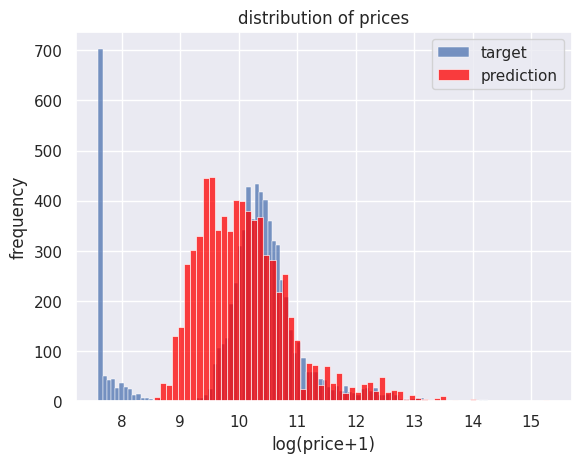

In [ ]:
sns.histplot(y_train, label='target')
sns.histplot(y_pred, label='prediction' ,color = 'red')

plt.legend()

plt.ylabel('frequency')
plt.xlabel('log(price+1)')
plt.title('distribution of prices')

plt.show()





> use root mean square error to show how much am i near or far from the model




In [ ]:
def rmse(y , y_pred):
  error = y_pred - y
  mse = (error ** 2).mean()
  return np.sqrt(mse)

In [ ]:
rmse(y_train , y_pred)

0.7574439819012008

In [ ]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [ ]:
rmse(y_val , y_pred)

0.7502502346381938

#simple feature engineering


> using one hot encoding



In [ ]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df['age'] = 2017 - df.year   #because the data set was creatwd in 2017 (which we can verify by chicking df_train.year.max)
  features.append('age')

  df_num = df[features]
  df_num = df_num.fillna(df_num.mean())
  X = df_num.values
  return X


In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
print('Train RMSE : ',rmse(y_train , y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE : ',rmse(y_val , y_pred))

Train RMSE :  0.5117454503079418
Validation RMSE :  0.5070033906013028


#handling categorical data

In [ ]:
df.number_of_doors.value_counts()

number_of_doors
4.00    8353
2.00    3160
3.00     395
Name: count, dtype: int64

In [ ]:
df.make.value_counts().head(10)

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
nissan         558
gmc            515
honda          449
mazda          423
cadillac       397
Name: count, dtype: int64

In [ ]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df['age'] = 2017 - df.year
  features.append('age')

  for v in [2, 3, 4]:
    feature = 'num_doors_%s' % v
    df[feature] = (df['number_of_doors'] == v).astype(int)
    features.append(feature)

  for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
    feature = 'is_make_%s' % v
    df[feature] = (df['make'] == v).astype(int)
    features.append(feature)

  df_num = df[features]
  df_num = df_num.fillna(df_num.mean())
  X= df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('Train RMSE : ',rmse(y_train , y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE : ',rmse(y_val , y_pred))

Train RMSE :  0.5010764007201611
Validation RMSE :  0.4982643557277196


In [ ]:
df['engine_fuel_type'].value_counts()

engine_fuel_type
regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: count, dtype: int64

In [ ]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df['age'] = 2017 - df.year
  features.append('age')

  for v in [2, 3, 4]:
    feature = 'num_doors_%s' % v
    df[feature] = (df['number_of_doors'] == v).astype(int)
    features.append(feature)

  for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
    feature = 'is_make_%s' % v
    df[feature] = (df['make'] == v).astype(int)
    features.append(feature)

  for v in ['regular_unleaded', 'premium_unleaded_(required)',
            'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
    feature = 'is_type_%s' % v
    df[feature] = (df['engine_fuel_type'] == v).astype(int)
    features.append(feature)

  df_num = df[features]
  df_num = df_num.fillna(df_num.mean())
  X= df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('Train RMSE : ',rmse(y_train , y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE : ',rmse(y_val , y_pred))

Train RMSE :  0.4763631998894518
Validation RMSE :  0.47075974075252836


In [ ]:
df['transmission_type'].value_counts()

transmission_type
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: count, dtype: int64

In [ ]:
df['driven_wheels'].value_counts()

driven_wheels
front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: count, dtype: int64

In [ ]:
df['market_category'].value_counts()

market_category
crossover                                          1110
flex_fuel                                           872
luxury                                              855
luxury,performance                                  673
hatchback                                           641
                                                   ... 
crossover,exotic,luxury,performance                   1
exotic,luxury,high-performance,hybrid                 1
crossover,exotic,luxury,high-performance              1
flex_fuel,factory_tuner,luxury,high-performance       1
performance,hybrid                                    1
Name: count, Length: 71, dtype: int64

In [ ]:
df['vehicle_size'].value_counts()

vehicle_size
compact    4764
midsize    4373
large      2777
Name: count, dtype: int64

In [ ]:
df['vehicle_style'].value_counts()

vehicle_style
sedan                  3048
4dr_suv                2488
coupe                  1211
convertible             793
4dr_hatchback           702
crew_cab_pickup         681
extended_cab_pickup     623
wagon                   592
2dr_hatchback           506
passenger_minivan       417
regular_cab_pickup      392
2dr_suv                 138
passenger_van           128
cargo_van                95
cargo_minivan            71
convertible_suv          29
Name: count, dtype: int64

In [ ]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df['age'] = 2017 - df.year
  features.append('age')

  for v in [2, 3, 4]:
    feature = 'num_doors_%s' % v
    df[feature] = (df['number_of_doors'] == v).astype(int)
    features.append(feature)

  for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
    feature = 'is_make_%s' % v
    df[feature] = (df['make'] == v).astype(int)
    features.append(feature)

  for v in ['regular_unleaded', 'premium_unleaded_(required)',
            'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
    feature = 'is_type_%s' % v
    df[feature] = (df['engine_fuel_type'] == v).astype(int)
    features.append(feature)
  for v in ['automatic', 'manual', 'automated_manual']:
    feature = 'is_transmission_%s' % v
    df[feature] = (df['transmission_type'] == v).astype(int)
    features.append(feature)

  df_num = df[features]
  df_num = df_num.fillna(df_num.mean())
  X= df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('Train RMSE : ',rmse(y_train , y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE : ',rmse(y_val , y_pred))

Train RMSE :  0.47227213583716005
Validation RMSE :  0.4653694386689132


In [ ]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('Train RMSE : ',rmse(y_train , y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE : ',rmse(y_val , y_pred))

Train RMSE :  2219.4977297377545
Validation RMSE :  795.8906366825912




> the train and validation Root Mean square error is have been too big



In [ ]:
w.astype(int)

array([                 4,                133,                 83,
                       87,                  0,                 65,
                    76152,              76653,              76029,
                      -75,                -87,                296,
                     -181,                 64,               1753,
                     1499,               1645,               1882,
                     4513,               4348,               4323,
       -77440924947065216, -77440924947064944, -77440924947064576,
       -77440924947064240,                 55,                 79,
                      -71,               -204,               -280,
                     -455,               -243,               -329,
                        0,                  0,                  0,
                        0,                  0])

#regularization

In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  reg = r * np.eye(XTX.shape[0])
  XTX = XTX + reg

  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)
  return w[0], w[1:]

In [ ]:
X_train = prepare_X(df_train)

In [ ]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
  print('%5s, %.2f, %.2f, %.2f' % (r, w_0 ,w[13] , w[21]))

    0, 77440924946976912.00, 64.03, -77440924947065216.00
1e-06, 6.96, -0.10, 1.76
0.0001, 6.96, -0.10, 1.76
0.001, 6.96, -0.10, 1.76
 0.01, 6.95, -0.10, 1.76
  0.1, 6.82, -0.10, 1.73
    1, 6.04, -0.10, 1.52
    5, 4.86, -0.10, 1.21
   10, 4.32, -0.09, 1.07


In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('Train RMSE : ',rmse(y_train , y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE : ',rmse(y_val , y_pred))

Train RMSE :  0.4623435462011015
Validation RMSE :  0.45751588650897834


In [ ]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
  y_pred = w_0 + X_train.dot(w)
  print('%6s' % r, rmse(y_train, y_pred))

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE : ',rmse(y_val , y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test RMSE : ',rmse(y_test , y_pred))

Validation RMSE :  0.45751588650897834
test RMSE :  0.4546002212754332


#Using the model

In [ ]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031,
 'price': 31120,
 'log_price': 10.345638111452145}

In [ ]:
X_test = prepare_X(pd.DataFrame([ad]))
y_pred = w_0 + X_test.dot(w)
suggestion = np.exp(y_pred)-1  #because we took the log price not the price so we need to return it to the price
suggestion

array([28468.75677144])